# Netflix Movie length analysis: Datacamp Project01

## Task

![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Contents

- import libraries
- Read Dataframe
- Data Preprocessing
    - check for missing values
    - Data Filtering
- Understanding Data
- Basic Analysis
    - Duration
    - Duration vs Country
    - Duration vs Release Year
- Discussion
- Conclusion

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

## Read Dataframe

In [2]:
netflix_df = pd.read_csv('netflix_data.csv', parse_dates=['date_added'])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas


## Getting Movie Type
As we need to analysis only the Movie type. 

In [3]:
mov = netflix_df[netflix_df['type'] == 'Movie']

In [4]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5377 non-null   object        
 1   type          5377 non-null   object        
 2   title         5377 non-null   object        
 3   director      5214 non-null   object        
 4   cast          4951 non-null   object        
 5   country       5147 non-null   object        
 6   date_added    5377 non-null   datetime64[ns]
 7   release_year  5377 non-null   int64         
 8   duration      5377 non-null   int64         
 9   description   5377 non-null   object        
 10  genre         5377 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 504.1+ KB


In [5]:
mov.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [6]:
mov.shape

(5377, 11)

## Data Preprocessing

### Checking for missing values
Director, cast, country have missing values. <br>
 Among these 3, Country and Date_added are comparatively more relevant to the analysis.

In [7]:
mov.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added      False
release_year    False
duration        False
description     False
genre           False
dtype: bool

<AxesSubplot: >

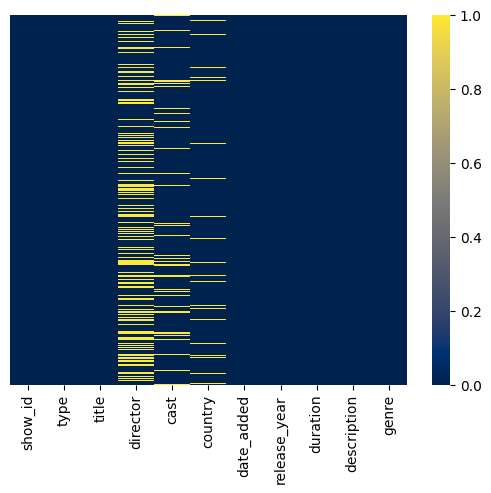

In [8]:
sns.heatmap(netflix_df.isna(), yticklabels=False, cmap='cividis')

In [9]:
mov.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
duration          0
description       0
genre             0
dtype: int64

### handling missing values
- 5% approach
- drop if not important (Cast information not necessarily have a correlation with the duration)

In [10]:
threshold = len(mov) * .05
cols_to_drop = mov.columns[mov.isna().sum() <= threshold]
print(threshold, cols_to_drop)

268.85 Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


In [11]:
mov.dropna(subset=cols_to_drop, inplace=True)

h:\installed_softwares\anaconda_setup\envs\tf\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
mov.shape

(5024, 11)

In [13]:
mov.isna().sum()

show_id           0
type              0
title             0
director          0
cast            347
country           0
date_added        0
release_year      0
duration          0
description       0
genre             0
dtype: int64

In [14]:
mov['cast'].describe() 

count            4677
unique           4563
top       Samuel West
freq               10
Name: cast, dtype: object

not affecting the duration of movie as there are 4563 different cast type here. almost unique casting for each movie. :3 dropna from cast.

In [15]:
mov.dropna(subset=['cast'], inplace=True)

In [16]:
mov.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [17]:
mov.shape

(4677, 11)

Now dataframe has no missing values and ready for use. Next comes filtering irrelevant columns that we won't consider for this time.

### Data Filtering
dropping show_id, director, cast, description as they have little effect on the duration of the movie. Also remove type as now there is only 1 type: Movie

In [18]:
mov.drop(columns=['show_id', 'director', 'cast', 'description', 'type', 'date_added'], inplace=True)

h:\installed_softwares\anaconda_setup\envs\tf\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
mov.head()

,title,country,release_year,duration,genre
1,7:19,Mexico,2016,93,Dramas
2,23:59,Singapore,2011,78,Horror Movies
3,9,United States,2009,80,Action
4,21,United States,2008,123,Dramas
6,122,Egypt,2019,95,Horror Movies


## Understanding Data

In [20]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 1 to 7783
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4677 non-null   object
 1   country       4677 non-null   object
 2   release_year  4677 non-null   int64 
 3   duration      4677 non-null   int64 
 4   genre         4677 non-null   object
dtypes: int64(2), object(3)
memory usage: 219.2+ KB


### Nunique

In [21]:
for x in mov.columns:
    print(x, mov[x].nunique())

title 4677
country 72
release_year 71
duration 186
genre 18


### Country & Genre Description

In [22]:
mov['country'].describe()

count              4677
unique               72
top       United States
freq               1856
Name: country, dtype: object

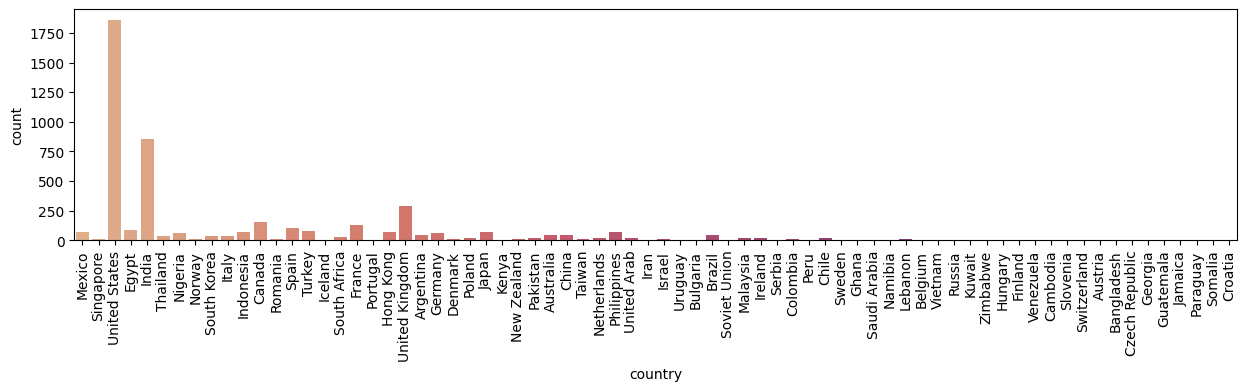

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 3))
sns.countplot(data=mov, x="country", palette="flare")
plt.xticks(rotation=90);

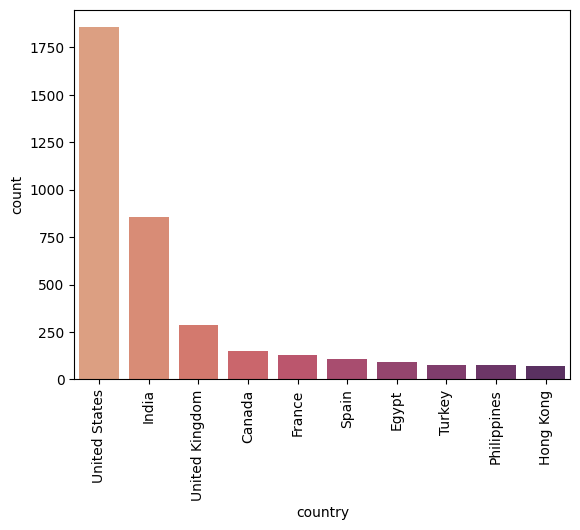

In [24]:

countries = mov['country'].value_counts().head(10).index
sns.countplot(
    data=mov[mov["country"].isin(countries)],
    x="country",
    palette="flare",
    order=mov[mov["country"].isin(countries)]['country'].value_counts().sort_values(ascending=False).index,
)
plt.xticks(rotation=90);

Top 5 countries with netflix movies are: USA, IND, UK, CA, FRN

In [25]:
mov["genre"].describe()

count       4677
unique        18
top       Dramas
freq        1343
Name: genre, dtype: object

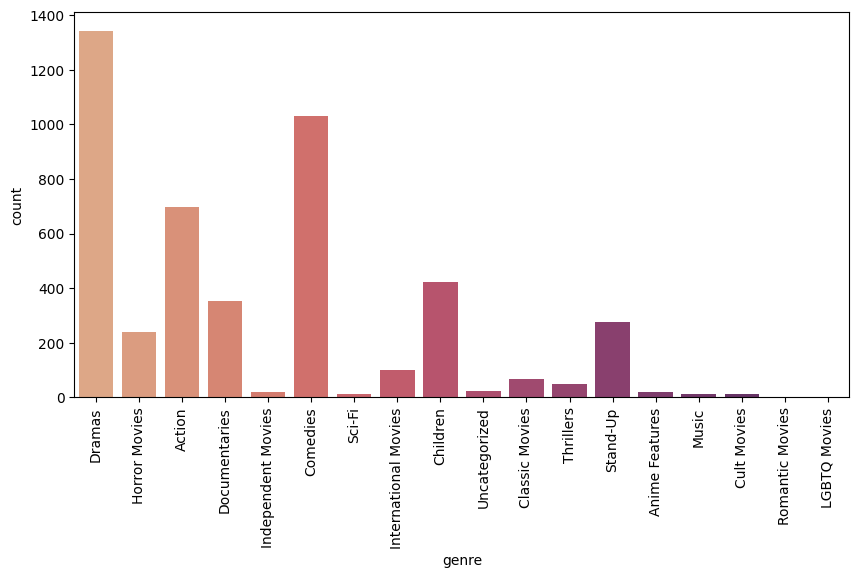

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((10,5))
sns.countplot(data=mov, x='genre', palette='flare')
plt.xticks(rotation=90);


Dramas is most released movie genre followed by comedies and action. 

### Release Year

In [27]:
print(mov["release_year"].min(), mov["release_year"].max())

1942 2021


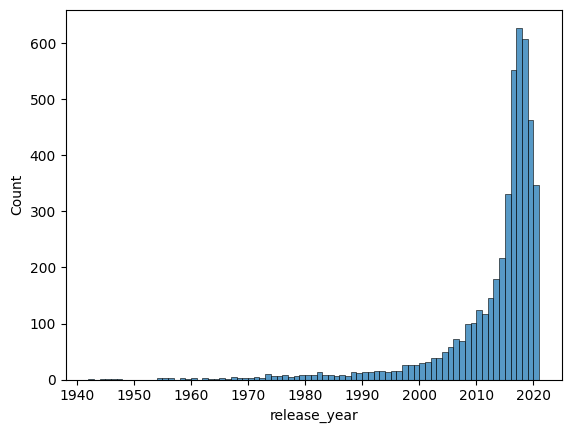

In [28]:
sns.histplot(data=mov, x="release_year", binwidth=1);

So, maximum movie released was in 2018 > 2019 > 2017 > 2020 > 2016 

### target feature: duration

#### distribution

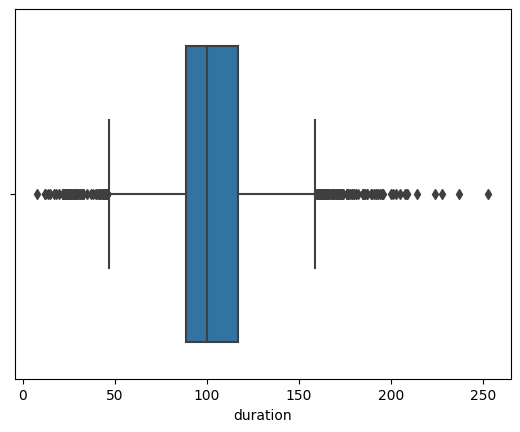

In [29]:
sns.boxplot(data=mov, x='duration');

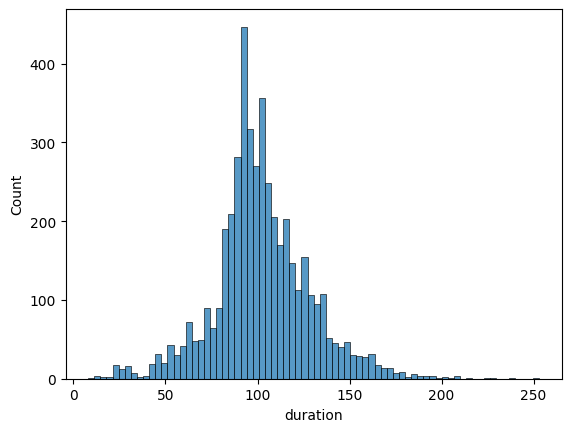

In [30]:
sns.histplot(data=mov, x='duration');

#### distribution without outliers

In [31]:
IQR = mov["duration"].quantile(0.75) - mov["duration"].quantile(0.25)

lower_limit = mov["duration"].quantile(0.25) - (1.5 * IQR)
upper_limit = mov["duration"].quantile(0.75) + (1.5 * IQR)

print(lower_limit, upper_limit)

47.0 159.0


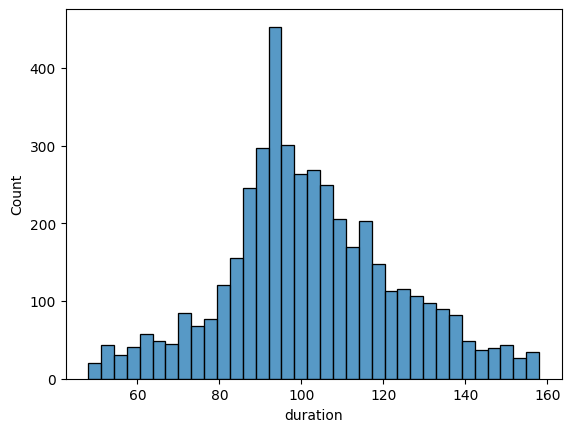

In [32]:
sns.histplot(data=mov[(mov["duration"] > lower_limit) & (mov["duration"] < upper_limit)], x="duration");

In [33]:
print(mov.shape, mov[(mov["duration"] > lower_limit) & (mov["duration"] < upper_limit)].shape)

(4677, 5) (4427, 5)


around 250 data is being outlier here.

In [34]:
mov["duration"].describe()

count    4677.000000
mean      102.384648
std        26.428435
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

In [35]:
mov[(mov["duration"] > lower_limit) & (mov["duration"] < upper_limit)]['duration'].describe()

count    4427.000000
mean      101.981477
std        21.157707
min        48.000000
25%        89.000000
50%       100.000000
75%       115.000000
max       158.000000
Name: duration, dtype: float64

the quartiles remain indentical where only the mean shifts from 102.38 to 101.99 and std shifts from 26.42 to 21.15 when described without outliers. So, the outliers aren't expected to effect the distribution a lot here.

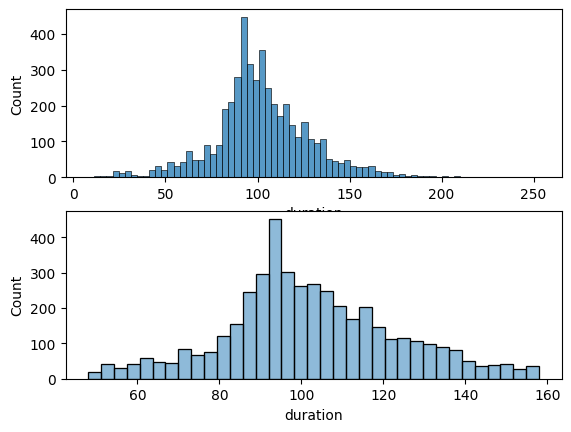

In [36]:
fig, ax = plt.subplots(2,1)
sns.histplot(data=mov, x="duration", ax=ax[0])
sns.histplot(
    data=mov[(mov["duration"] > lower_limit) & (mov["duration"] < upper_limit)],
    x="duration",
    ax=ax[1], alpha=.5
);

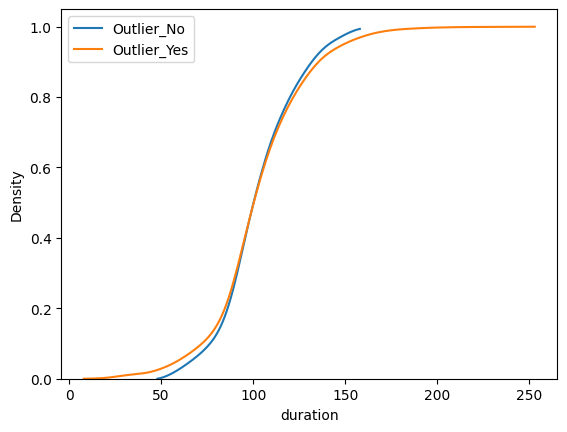

In [37]:
fig, ax = plt.subplots()
sns.kdeplot(
    data=mov[(mov["duration"] > lower_limit) & (mov["duration"] < upper_limit)],
    x="duration",
    cumulative=True, ax=ax, cut=0, label= 'Outlier_No'
)
sns.kdeplot(data=mov, x="duration", cumulative=True, ax=ax, cut=0, label="Outlier_Yes")
ax.legend();

As expected: the outliers are not effecting the distribution here that much.

## Basic Analysis

### duration 

#### Pareto Analysis

In [38]:
x_80th = mov[
    "duration"
].quantile(0.8)

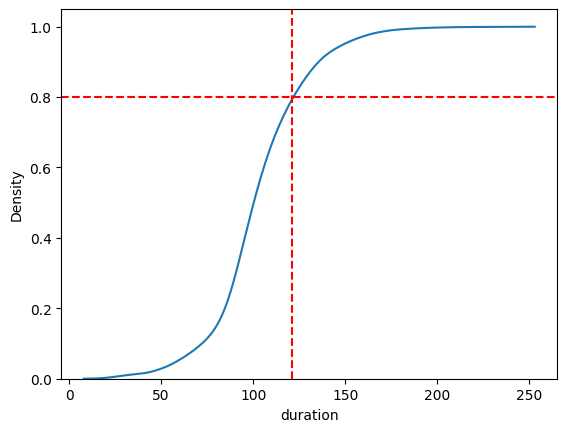

In [39]:
fig, ax = plt.subplots()
sns.kdeplot(
    data=mov,
    x="duration",
    cumulative=True,
    cut=0,
)
plt.axhline(y=0.8, color="r", linestyle="--")
plt.axvline(x=x_80th, color="r", linestyle="--")
plt.show()

In [40]:
mov['duration'].quantile(.8)

121.0

it shows 80% of all movies are less or equal 2 hours in length! Only 20% movies are greater than 2 hours length.

#### categorizing the duration
- short: 0-1hr 
- medium: 1-2hr
- long: 2hr+

In [41]:
labels = ['short', 'medium', 'long']
bins = [0, 60, 120, mov['duration'].max()]
mov["duration_category"] = pd.cut(mov['duration'], labels=labels, bins=bins)

mov[['duration', 'duration_category']].head()

C:\Users\ahnaf\AppData\Local\Temp\ipykernel_7008\2693002092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov["duration_category"] = pd.cut(mov['duration'], labels=labels, bins=bins)


,duration,duration_category
1,93,medium
2,78,medium
3,80,medium
4,123,long
6,95,medium


### duration vs country

Considering top 5 countries in terms of producing movies. 

In [42]:
countries = mov["country"].value_counts().head(5).index
mov_country = mov[mov['country'].isin(countries)]


In [43]:
avg_duration = mov_country.pivot_table(index=['country'], values=['duration'], columns=['duration_category'], aggfunc='mean')
avg_duration

duration                        
duration_category      short      medium        long
country                                             
Canada             38.733333   93.000000  136.333333
France             46.500000   96.278261  133.100000
India              45.500000  104.753846  142.668550
United Kingdom     46.250000   95.961722  134.541667
United States      45.683871   92.769582  136.905325

In [44]:
avg_duration = avg_duration.droplevel(0, axis=1)
avg_duration.index.name = ''
avg_duration.columns.name = ''

In [45]:
avg_duration

,short,medium,long
,,,
Canada,38.733333,93.000000,136.333333
France,46.500000,96.278261,133.100000
India,45.500000,104.753846,142.668550
United Kingdom,46.250000,95.961722,134.541667
United States,45.683871,92.769582,136.905325


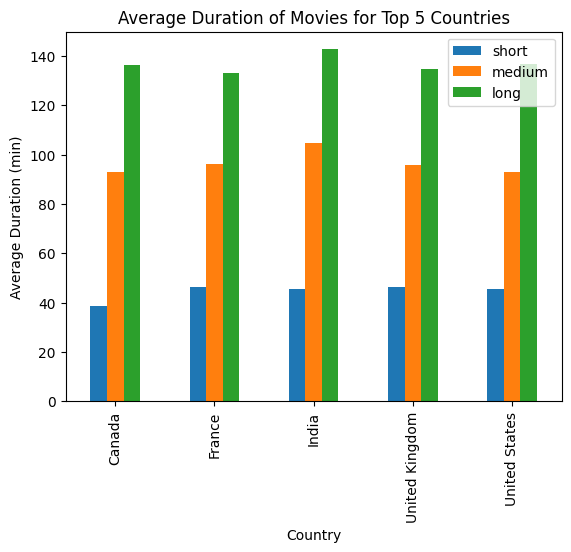

In [46]:
avg_duration.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Duration (min)')
plt.title('Average Duration of Movies for Top 5 Countries');

Average duration for all 3 types of movies seems to similar across the top 5 countries.

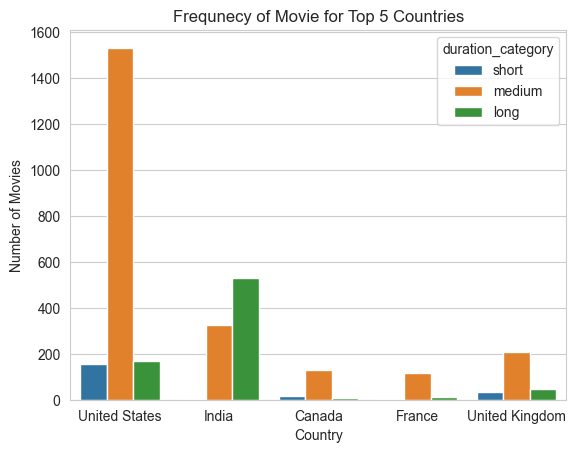

In [47]:
sns.set_style('whitegrid')
sns.countplot(data=mov_country, x="country", hue="duration_category")
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Frequnecy of Movie for Top 5 Countries');

India leads in producing long movies, USA in medium movies. Also, only USA, UK and CA are interested in producing short films it seems. <br> <br>

So, we will focus on:
- IND for long movies
- USA for both medium and short primarily

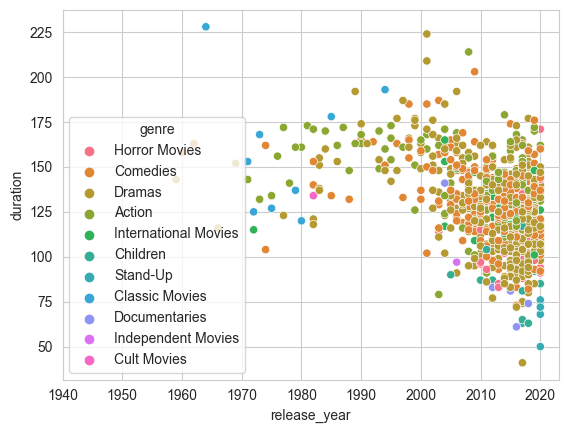

In [48]:
sns.scatterplot(data=mov_country[mov_country["country"] == "India"], x="release_year", y="duration", hue='genre')
plt.xticks(np.arange(1940, 2030, 10), np.arange(1940, 2030, 10));


This clears nothing. Lets try different plots. 

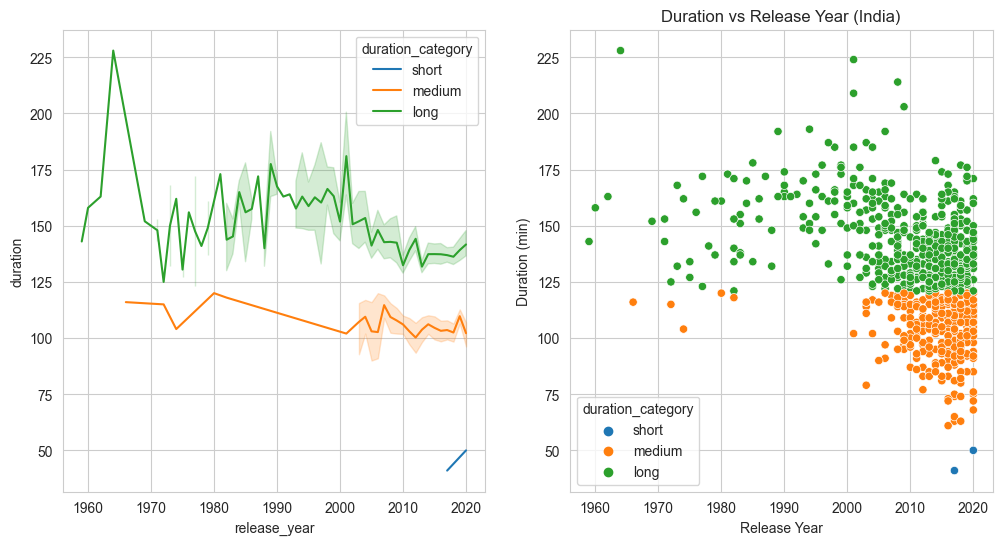

In [49]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((12,6))
sns.lineplot(data=mov_country[(mov_country["country"] == 'India')], x="release_year", y="duration", hue="duration_category", ax=ax[0])
sns.scatterplot(data=mov_country[(mov_country["country"] == 'India')], x="release_year", y="duration", hue="duration_category", ax=ax[1])
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.title('Duration vs Release Year (India)');

This gives a primary level idea that the duration is getting up and down. Let's look at regression line for these.

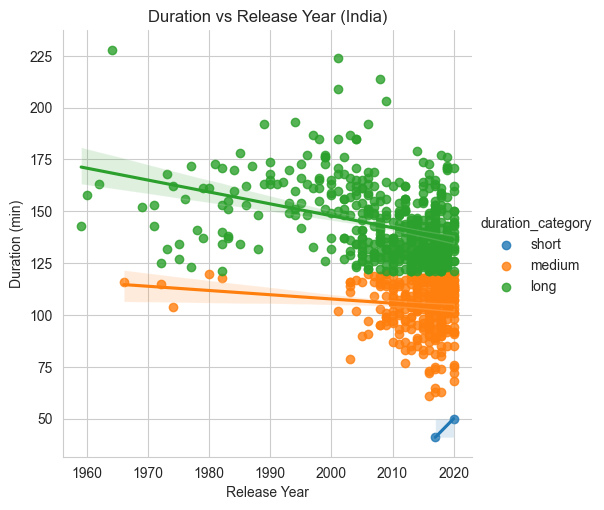

In [50]:
sns.lmplot(
        data=mov_country[(mov_country["country"] == 'India')],
        x="release_year",
        y="duration",
        hue="duration_category",)
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.title('Duration vs Release Year (India)');

As it seems: IND in long movies: the slope (green) is clearly negative. So, duration of long movies in IND is decreasing over time. That can be said. But is it true for other medium or short? For lack of data, same can't be said. 

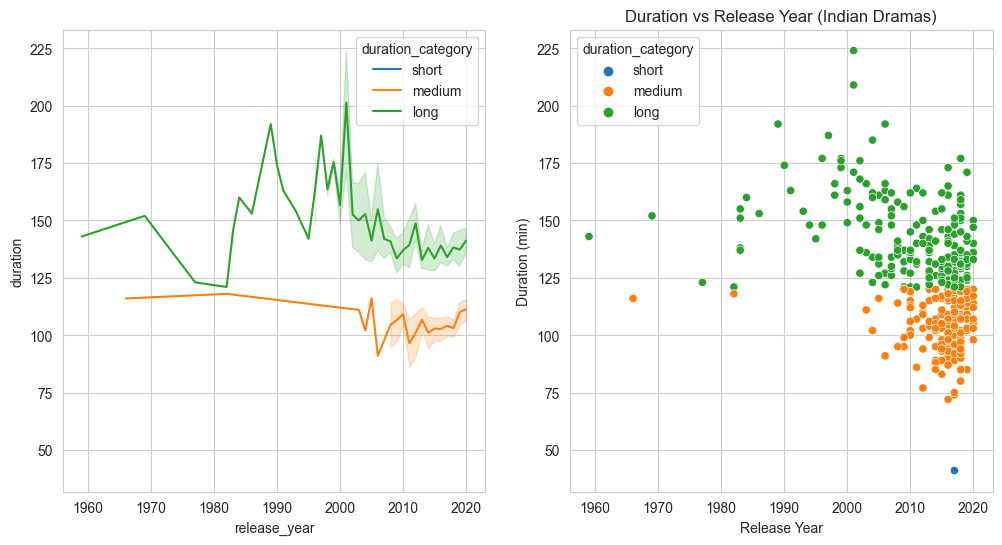

In [51]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((12,6))
sns.lineplot(data=mov_country[(mov_country["country"] == 'India') & (mov_country["genre"] == 'Dramas')], x="release_year", y="duration", hue="duration_category", ax=ax[0])
sns.scatterplot(data=mov_country[(mov_country["country"] == 'India') & (mov_country["genre"] == 'Dramas')], x="release_year", y="duration", hue="duration_category", ax=ax[1])
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.title('Duration vs Release Year (Indian Dramas)');



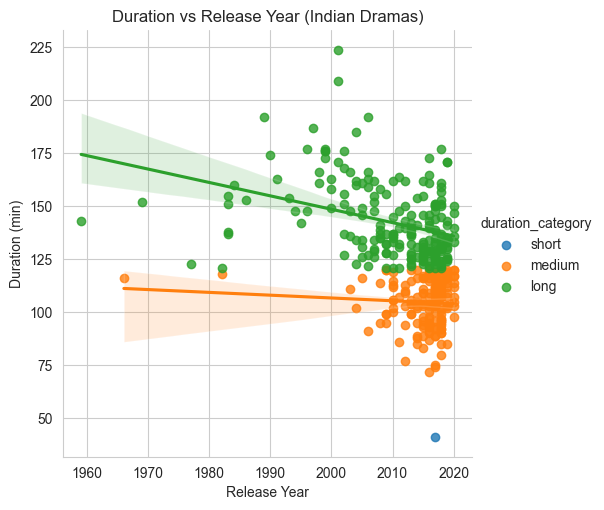

In [52]:
sns.lmplot(
        data=mov_country[(mov_country["country"] == 'India') & (mov_country["genre"] == 'Dramas')],
        x="release_year",
        y="duration",
        hue="duration_category",)
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.title('Duration vs Release Year (Indian Dramas)');

Here, for particular genre, IND movies are visualized again. As expected: Indian long duration dramas are decreasing over time. <br> <br>

same process can be iterated again focusing on USA: medium and short movies.

### duration vs release_year


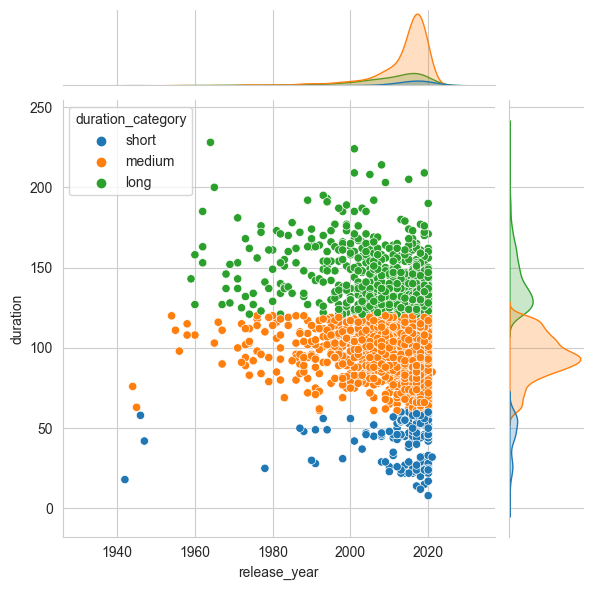

In [53]:
sns.jointplot(data=mov_country, x='release_year', y='duration', hue='duration_category');

In [54]:
mov_country['release_year'].describe()

count    3283.000000
mean     2012.084069
std         9.852767
min      1942.000000
25%      2010.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [55]:
np.arange(
    mov_country["release_year"].min() - (mov_country["release_year"].min() % 10) - 1,
    mov_country["release_year"].max() + 10, 10
)

array([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2029],
      dtype=int64)

#### converting year into decade
- 1940-1949 : 1940s
- 1950-1959 : 1950s
- 1960-1969 : 1960s
- 1970-1979 : 1970s
- 1980-1989 : 1980s
- 1990-1999 : 1990s
- 2000-2009 : 2000s
- 2010-2019 : 2010s
- 2020-2029 : 2020s

In [56]:
labels = ["1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]
bins = np.arange(mov_country["release_year"].min() - (mov_country["release_year"].min() % 10) - 1, mov_country["release_year"].max() + 10, 10)
# bins = [0, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, mov["release_year"].max()]

mov_country["year_decade"] = pd.cut(mov_country["release_year"], labels=labels, bins=bins)

mov_country[["release_year", "year_decade"]].head()

C:\Users\ahnaf\AppData\Local\Temp\ipykernel_7008\35943405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_country["year_decade"] = pd.cut(mov_country["release_year"], labels=labels, bins=bins)


,release_year,year_decade
3,2009,2000s
4,2008,2000s
7,1997,1990s
8,2019,2010s
9,2008,2000s


In [57]:
mov_country['year_decade'].value_counts()

2010s    2277
2000s     470
2020s     242
1990s     156
1980s      68
1970s      42
1960s      17
1950s       6
1940s       5
Name: year_decade, dtype: int64

In [59]:
d = pd.crosstab(mov_country['year_decade'], mov_country['duration_category'], values=mov_country['duration'], aggfunc='mean')
d 

duration_category,short,medium,long
year_decade,,,
1940s,39.333333,69.500000,NaN
1950s,NaN,110.400000,143.000000
1960s,NaN,105.600000,158.666667
1970s,25.000000,101.173913,147.166667
1980s,49.000000,98.564103,150.925926
1990s,40.500000,99.321839,152.174603
2000s,43.416667,99.014493,144.296703
2010s,46.910345,93.977206,136.349169
2020s,41.333333,93.447853,136.950000


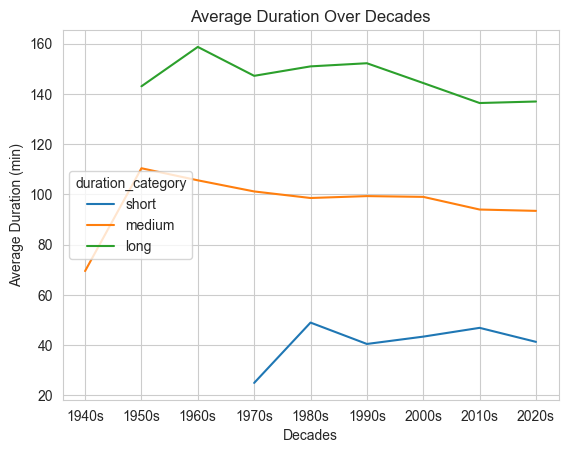

In [164]:
d.plot(kind='line')
plt.xlabel('Decades')
plt.ylabel('Average Duration (min)')
plt.title('Average Duration Over Decades');

As it seems: the average duration is to some extent flat, very slightly declining.

## Discussion

In this work, we only considered to go deep with duration column and release year column. Its possible to compare them country wise and then genre wise: which was not much focused here. There is a huge scopre to work with the genre column and establish insights whether genre affects the duration overall or not. 

## Conclusion

We saw that microscoping in to particular country and also for particular genre: duration length seems to decline over time but for lack of data: its not enough to produce evidence in general. We tried to find average durations for each decade and saw for each duration category: duration vs year follows a relatively flat line. So, we can't be certain if movies, in general, are getting shorter or not.


In [ ]:
answer = 'no'